In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn import linear_model

In [5]:
import seaborn as sns

In [7]:
from datetime import datetime, date

In [8]:
c_d = pd.read_excel(r"C:\Users\USER\OneDrive\Documents\customerDemographic.xlsx")

In [9]:
new_header = c_d.iloc[0]

In [10]:
c_d = c_d[1:]
c_d.columns = new_header

In [11]:
c_d.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [12]:
c_d.drop("default", axis = 1,inplace = True)
c_d["gender"] = c_d["gender"].replace(["F","Femal","U","M"],["Female","Female","Unknown","Male"])
c_d["owns_car"] = c_d["owns_car"].replace(["Yes","No"],[1,0])

In [13]:
c_d.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,1,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,1,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,1,15


In [14]:
c_d["DOB"] = pd.to_datetime(c_d["DOB"])

In [15]:
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [18]:
import datetime

In [19]:
c_d["age"] = c_d['DOB'].apply(lambda x: from_dob_to_age(x))

In [20]:
c_d.isnull().sum()

0
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
age                                     87
dtype: int64

In [21]:
c_d["job_industry_category"].fillna("miscellaneous",inplace = True)

In [22]:
required_CD = c_d[["customer_id","gender","DOB","job_industry_category","wealth_segment","owns_car","tenure","age"]]

In [23]:
required_CD.head(3)

,customer_id,gender,DOB,job_industry_category,wealth_segment,owns_car,tenure,age
1,1,Female,1953-10-12,Health,Mass Customer,1,11,68.0
2,2,Male,1980-12-16,Financial Services,Mass Customer,1,16,41.0
3,3,Male,1954-01-20,Property,Mass Customer,1,15,68.0


In [24]:
required_CD.isnull().sum()

0
customer_id               0
gender                    0
DOB                      87
job_industry_category     0
wealth_segment            0
owns_car                  0
tenure                   87
age                      87
dtype: int64

In [25]:
required_CD.shape

(4000, 8)

In [26]:
required_CD = required_CD.dropna()

In [27]:
add_df = pd.read_excel(r"C:\Users\USER\OneDrive\Documents\customer_address.xlsx")

In [28]:
add_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [29]:
header = add_df.iloc[0]
add_df = add_df[1:]
add_df.columns = header

In [30]:
add_df.head(3)

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9


In [31]:
add_df["state"].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [32]:
add_df["state"] = add_df["state"].replace(["New South Wales","Victoria"],["NSW","VIC"])

In [33]:
add_df.isnull().sum()

0
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [34]:
required_add = add_df[["customer_id","state","property_valuation"]]

In [35]:
t_df = pd.read_excel(r"C:\Users\USER\OneDrive\Documents\transactions.xlsx")

In [36]:
n_header = t_df.iloc[0]
t_df = t_df[1:]
t_df.columns = n_header

In [37]:
t_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [38]:
t_df.shape

(20000, 13)

In [39]:
t_df.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [40]:
clean_t_df = t_df.dropna()

In [41]:
clean_t_df.shape

(19445, 13)

In [42]:
last_purchase = clean_t_df["transaction_date"].max()

In [43]:
clean_t_df["last_buy_days_ago"] = last_purchase - clean_t_df["transaction_date"]

C:\Users\USER\AppData\Local\Temp/ipykernel_14384/3073187205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_t_df["last_buy_days_ago"] = last_purchase - clean_t_df["transaction_date"]


In [44]:
clean_t_df["profit"] = clean_t_df["list_price"]-clean_t_df["standard_cost"]

C:\Users\USER\AppData\Local\Temp/ipykernel_14384/3063771555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_t_df["profit"] = clean_t_df["list_price"]-clean_t_df["standard_cost"]


In [45]:
clean_t_df["profit"]

1          17.87
2        1702.55
3        1544.61
4         817.36
5        1055.82
          ...   
19996     802.26
19997     104.24
19998    1592.19
19999      91.15
20000     195.34
Name: profit, Length: 19445, dtype: object

In [46]:
clean_t_df.sort_values("customer_id")

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_buy_days_ago,profit
94,94,86,1,2017-12-23 00:00:00,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482,7 days,110.56
5157,5157,47,1,2017-05-11 00:00:00,True,Approved,Trek Bicycles,Road,low,small,1720.7,1531.42,37823,233 days,189.28
18970,18970,11,1,2017-03-29 00:00:00,True,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378,276 days,509.97
13424,13424,2,1,2017-02-21 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,38573,312 days,17.87
15663,15663,32,1,2017-06-04 00:00:00,True,Approved,Giant Bicycles,Standard,medium,medium,642.7,211.37,40618,209 days,431.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8562,8562,33,3500,2017-08-08 00:00:00,False,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888,144 days,144.26
6309,6309,69,3500,2017-01-09 00:00:00,True,Approved,Giant Bicycles,Road,medium,medium,792.9,594.68,33879,355 days,198.22
17469,17469,0,5034,2017-01-03 00:00:00,False,Approved,OHM Cycles,Road,medium,medium,742.54,667.400024,33879,361 days,75.139976
8708,8708,0,5034,2017-10-07 00:00:00,False,Approved,Solex,Road,medium,medium,416.98,312.735016,42218,84 days,104.244984


In [47]:
r_tdf = clean_t_df.groupby("customer_id").agg({
    "last_buy_days_ago" : lambda x: x.min(),
    "customer_id": lambda x: len(x),
    "profit" : lambda x: x.sum()
})

In [48]:
r_tdf.head()

,last_buy_days_ago,customer_id,profit
customer_id,,,
1,7 days,11,3018.09
2,128 days,3,2226.26
3,102 days,7,3290.21
4,195 days,2,220.57
5,16 days,6,2394.94


In [49]:
r_tdf.rename(columns = {
    'customer_id' : 'frequency'
},inplace=True)

In [50]:
r_tdf.shape

(3492, 3)

In [51]:
def f(row):
    if row['profit']>3000:
        value = 'Gold'
    elif (row['profit']<3000) & (row['profit']>2000):
        value = 'Silver'
    elif (row['profit']<2000) & (row['profit']>1000):
        value = 'Bronze'
    else:
        value = 'Basic'
    return value

In [52]:
r_tdf["customer_title"] = r_tdf.apply(f,axis = 1)

In [53]:
r_tdf.head(3)

,last_buy_days_ago,frequency,profit,customer_title
customer_id,,,,
1,7 days,11,3018.09,Gold
2,128 days,3,2226.26,Silver
3,102 days,7,3290.21,Gold


In [54]:
r_tdf.reset_index()

,customer_id,last_buy_days_ago,frequency,profit,customer_title
0,1,7 days,11,3018.090000,Gold
1,2,128 days,3,2226.260000,Silver
2,3,102 days,7,3290.210000,Gold
3,4,195 days,2,220.570000,Basic
4,5,16 days,6,2394.940000,Silver
...,...,...,...,...,...
3487,3497,52 days,3,1648.320000,Bronze
3488,3498,127 days,6,3147.330000,Gold
3489,3499,51 days,7,4955.250000,Gold
3490,3500,144 days,6,1785.860000,Bronze


In [55]:
df = pd.merge(required_CD,required_add,on="customer_id")

In [56]:
df.head()

,customer_id,gender,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,state,property_valuation
0,1,Female,1953-10-12,Health,Mass Customer,1,11,68.0,NSW,10
1,2,Male,1980-12-16,Financial Services,Mass Customer,1,16,41.0,NSW,10
2,4,Male,1961-10-03,IT,Mass Customer,0,7,60.0,QLD,9
3,5,Female,1977-05-13,miscellaneous,Affluent Customer,1,8,45.0,NSW,4
4,6,Male,1966-09-16,Retail,High Net Worth,1,13,55.0,VIC,9


In [57]:
df = pd.merge(df,r_tdf,on = "customer_id")

In [58]:
df.head()

,customer_id,gender,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,state,property_valuation,last_buy_days_ago,frequency,profit,customer_title
0,1,Female,1953-10-12,Health,Mass Customer,1,11,68.0,NSW,10,7 days,11,3018.09,Gold
1,2,Male,1980-12-16,Financial Services,Mass Customer,1,16,41.0,NSW,10,128 days,3,2226.26,Silver
2,4,Male,1961-10-03,IT,Mass Customer,0,7,60.0,QLD,9,195 days,2,220.57,Basic
3,5,Female,1977-05-13,miscellaneous,Affluent Customer,1,8,45.0,NSW,4,16 days,6,2394.94,Silver
4,6,Male,1966-09-16,Retail,High Net Worth,1,13,55.0,VIC,9,64 days,5,3946.55,Gold


In [59]:
df["customer_title"].value_counts().index

Index(['Gold', 'Silver', 'Bronze', 'Basic'], dtype='object')

In [60]:
def age_group(row):
    if row['age']<25:
        value = 'below 25'
    elif (row['age']<35) & (row['age']>=25):
        value = '25-35'
    elif (row['age']<45) & (row['age']>=35):
        value = '35-45'
    elif (row['age']<55) & (row['age']>=45):
        value = '45-55'
    elif (row['age']<65) & (row['age']>=55):
        value = '55-65'
    else:
        value = '65 and above'
    return value

In [61]:
df["age_group"] = df.apply(age_group,axis=1)

<AxesSubplot:xlabel='customer_title', ylabel='count'>

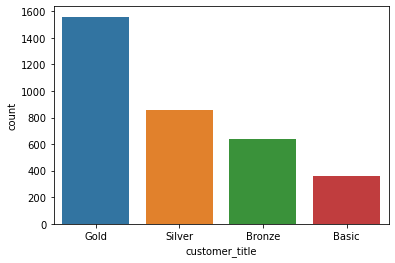

In [62]:
sns.countplot(x = 'customer_title',data = df,order = df["customer_title"].value_counts().index)

In [63]:
df["last_buy_days_ago"].dtypes

dtype('<m8[ns]')

In [64]:
df["last_buy_days_ago"] = pd.to_numeric(df["last_buy_days_ago"])

In [65]:
df["last_buy_days_ago"].dtypes

dtype('int64')

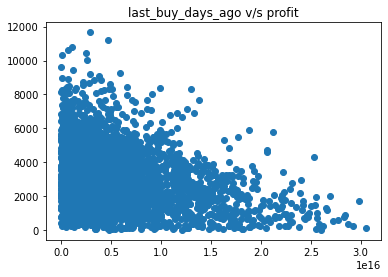

In [66]:
plt.scatter(df["last_buy_days_ago"],df["profit"])
plt.title("last_buy_days_ago v/s profit")
plt.show()

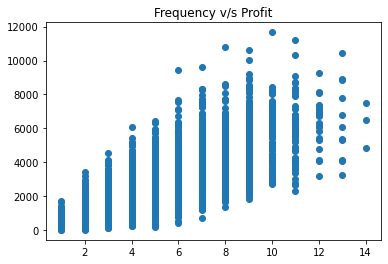

In [67]:
plt.scatter(df['frequency'], df['profit'])
plt.title('Frequency v/s Profit')
plt.show()

In [68]:
df["gender"].unique()

array(['Female', 'Male', 'Unknown'], dtype=object)

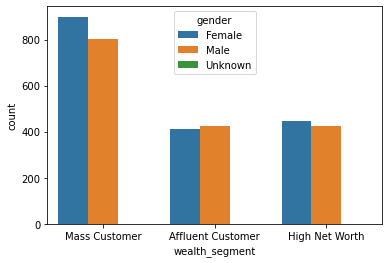

In [69]:
sns.countplot(x='wealth_segment', hue='gender', data=df)
plt.show()

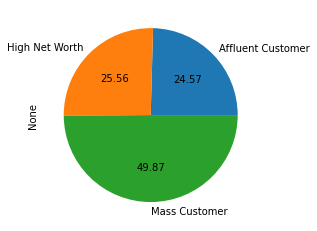

In [70]:
df.groupby('wealth_segment').size().plot(kind='pie', autopct='%.2f')
plt.show()

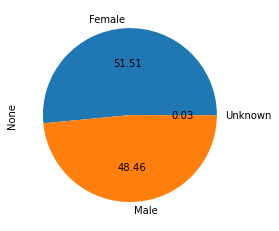

In [71]:
df.groupby('gender').size().plot(kind='pie', autopct='%.2f')
plt.show()

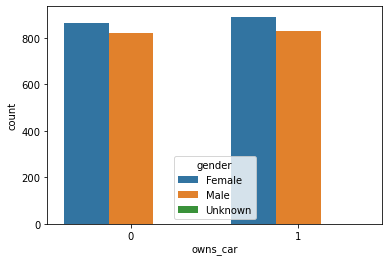

In [120]:
sns.countplot(x='owns_car', hue='gender', data=df)
plt.show()

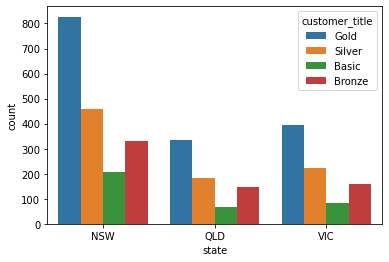

In [72]:
sns.countplot(x='state', hue='customer_title', data=df)
plt.show()

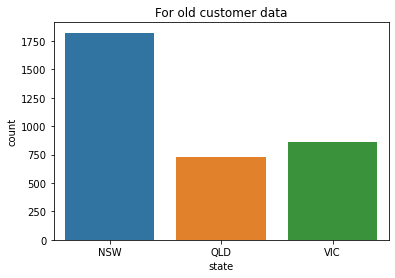

In [152]:
sns.countplot(x = 'state',data = df)
plt.title("For old customer data")
plt.show()

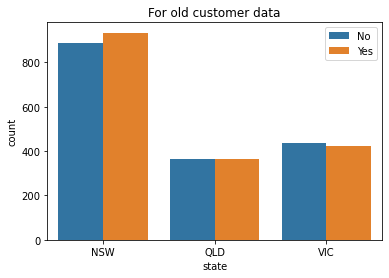

In [156]:
sns.countplot(x='state', hue='owns_car', data=df)
plt.title("For old customer data")
plt.legend(["No","Yes"])
plt.show()

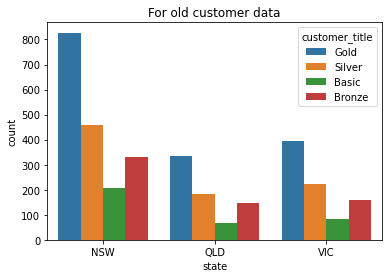

In [153]:
sns.countplot(x='state', hue='customer_title', data=df)
plt.title("For old customer data")
plt.show()

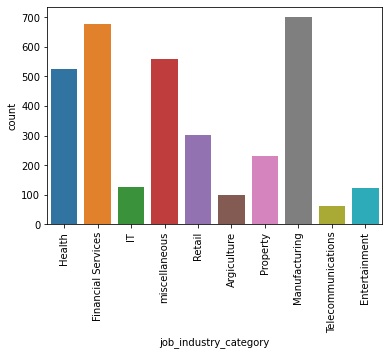

In [73]:
sns.countplot(x = 'job_industry_category',data = df)
plt.xticks(rotation=90)
plt.show()

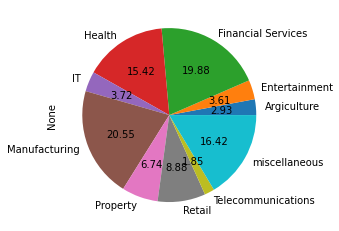

In [74]:
df.groupby('job_industry_category').size().plot(kind='pie', autopct='%.2f')
plt.show()

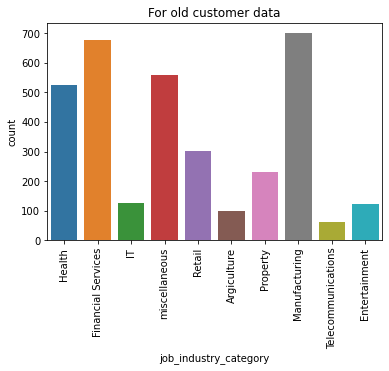

In [125]:
sns.countplot(x = 'job_industry_category',data = df)
plt.xticks(rotation=90)
plt.title("For old customer data")
plt.show()

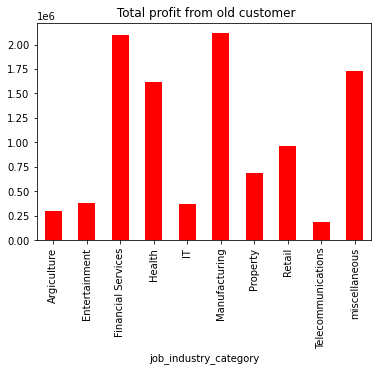

In [144]:
df.groupby("job_industry_category")["profit"].sum().plot(kind = 'bar',color = 'red')
plt.title(" Total profit from old customer")
plt.show()

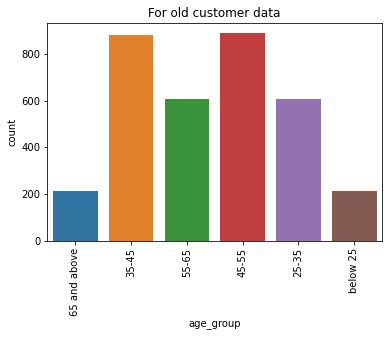

In [123]:
sns.countplot(x = 'age_group',data = df)
plt.xticks(rotation=90)
plt.title("For old customer data")
plt.show()

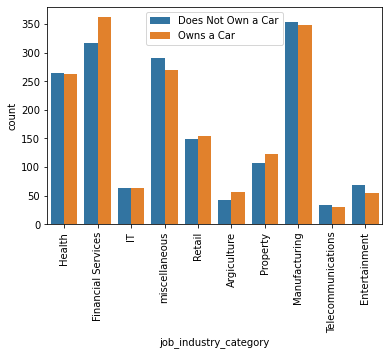

In [76]:
sns.countplot(x='job_industry_category', hue='owns_car', data=df)
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.xticks(rotation = 90)
plt.show()

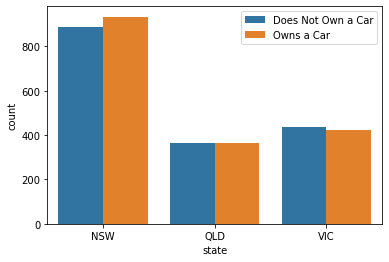

In [77]:
sns.countplot(x='state', hue='owns_car', data=df)
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

In [89]:
new_customer = pd.read_excel(r"C:\Users\USER\OneDrive\Documents\new_customer.xlsx")

In [90]:
new_customer.head(3)

,,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.44,0.55,0.6875,0.584375,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.88,0.88,1.1000,0.935000,1.0,1,1.71875


In [91]:
new_col_name = new_customer.iloc[0]
new_customer = new_customer[1:]
new_customer.columns = new_col_name

In [92]:
new_customer.columns=new_customer.columns.fillna('to_drop')
new_customer.drop('to_drop',axis=1,inplace=True)   #removing columns without a column name

In [93]:
new_customer.isnull().sum()

0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [94]:
new_customer.shape

(1000, 18)

In [95]:
new_customer["job_industry_category"].fillna("miscellaneous",inplace = True)

In [96]:
new_customer["DOB"] = pd.to_datetime(new_customer["DOB"])

In [97]:
new_customer["age"] = new_customer['DOB'].apply(lambda x: from_dob_to_age(x))

In [98]:
new_customer.isnull().sum()

0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
age                                     17
dtype: int64

In [99]:
new_customer["state"].unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [100]:
new_customer["gender"].unique()

array(['Male', 'Female', 'U'], dtype=object)

In [101]:
new_df = new_customer[["gender","past_3_years_bike_related_purchases","DOB","job_industry_category","wealth_segment","owns_car","state","property_valuation","age"]]

In [102]:
new_df.head(2)

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,state,property_valuation,age
1,Male,86,1957-07-12,Manufacturing,Mass Customer,Yes,QLD,6,65.0
2,Male,69,1970-03-22,Property,Mass Customer,No,NSW,11,52.0


In [103]:
new_df = new_df.dropna()

In [104]:
new_df.shape

(983, 9)

In [105]:
def age_group(row):
    if row['age']<25:
        value = 'below 25'
    elif (row['age']<35) & (row['age']>=25):
        value = '25-35'
    elif (row['age']<45) & (row['age']>=35):
        value = '35-45'
    elif (row['age']<55) & (row['age']>=45):
        value = '45-55'
    elif (row['age']<65) & (row['age']>=55):
        value = '55-65'
    else:
        value = '65 and above'
    return value
new_df["age_group"] = new_df.apply(age_group,axis = 1)

In [106]:
new_df.head(3)

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,state,property_valuation,age,age_group
1,Male,86,1957-07-12,Manufacturing,Mass Customer,Yes,QLD,6,65.0,65 and above
2,Male,69,1970-03-22,Property,Mass Customer,No,NSW,11,52.0,45-55
3,Female,10,1974-08-28,Financial Services,Affluent Customer,No,VIC,5,48.0,45-55


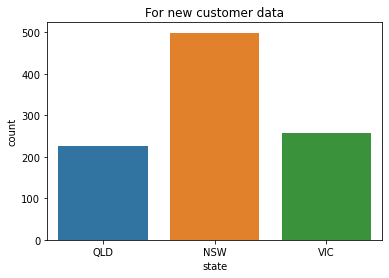

In [148]:
sns.countplot(x = "state",data = new_df)
plt.title("For new customer data")
plt.show()

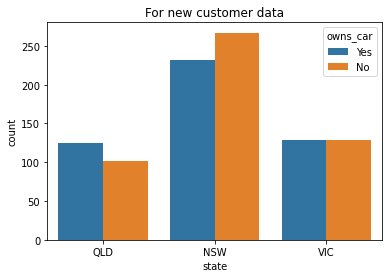

In [150]:
sns.countplot(x = "state",hue = "owns_car", data = new_df)
plt.title("For new customer data")
plt.show()

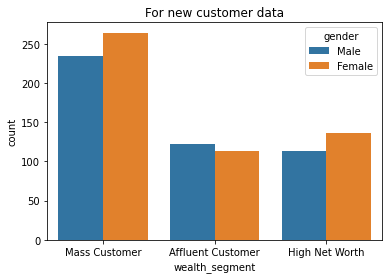

In [122]:
sns.countplot(x='wealth_segment', hue='gender', data=new_df)
plt.title("For new customer data")
plt.show()

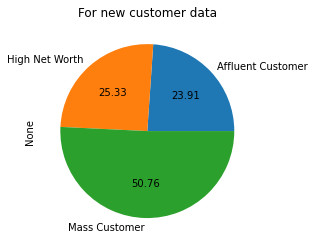

In [108]:
new_df.groupby('wealth_segment').size().plot(kind='pie', autopct='%.2f')
plt.title("For new customer data")
plt.show()

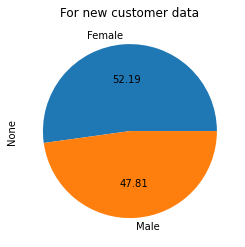

In [109]:
new_df.groupby('gender').size().plot(kind='pie', autopct='%.2f')
plt.title("For new customer data")
plt.show()

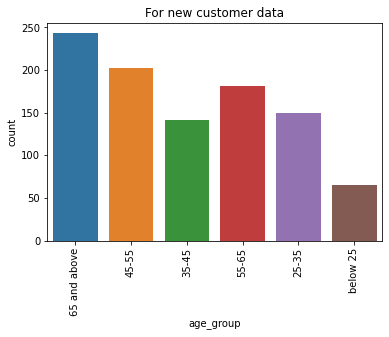

In [110]:
sns.countplot(x = 'age_group',data = new_df)
plt.xticks(rotation=90)
plt.title("For new customer data")
plt.show()

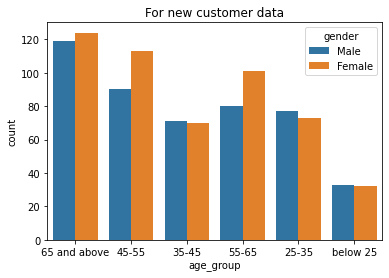

In [111]:
sns.countplot(x='age_group', hue='gender', data=new_df)
plt.title("For new customer data")
plt.show()

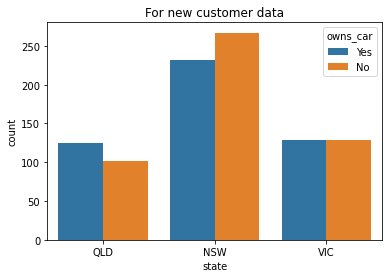

In [114]:
sns.countplot(x='state', hue='owns_car', data=new_df)
plt.title("For new customer data")
plt.show()

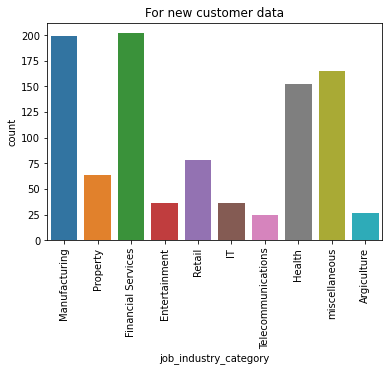

In [140]:
sns.countplot(x = 'job_industry_category',data = new_df)
plt.xticks(rotation=90)
plt.title("For new customer data")
plt.show()

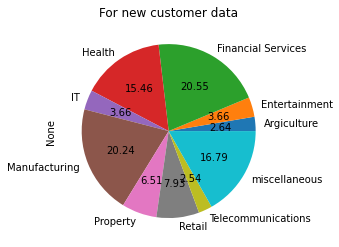

In [142]:
new_df.groupby('job_industry_category').size().plot(kind='pie', autopct='%.2f')
plt.title("For new customer data")
plt.show()

In [157]:
new_df.head(3)

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,state,property_valuation,age,age_group
1,Male,86,1957-07-12,Manufacturing,Mass Customer,Yes,QLD,6,65.0,65 and above
2,Male,69,1970-03-22,Property,Mass Customer,No,NSW,11,52.0,45-55
3,Female,10,1974-08-28,Financial Services,Affluent Customer,No,VIC,5,48.0,45-55
